<a href="https://colab.research.google.com/github/PyAshishMhatre/Covid19-tweets-sentiment-analysis/blob/main/Covid_tweets_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from string import punctuation
!pip3 install emoji
import emoji

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [57]:
traindf = pd.read_csv("/content/Corona_NLP_train.csv", encoding='latin_1')
testdf = pd.read_csv("/content/Corona_NLP_test.csv", encoding='latin_1')

In [58]:
traindf.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [59]:
traindf.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [60]:
testdf.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [61]:
testdf.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [62]:
traindf.drop_duplicates(inplace= True)
testdf.drop_duplicates(inplace=True)

In [63]:
traindf.fillna('Not available', inplace =True)
testdf.fillna('Not available', inplace = True)

In [64]:
testdf.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [65]:
traindf.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [66]:
traindf.shape

(41157, 6)

In [67]:
traindf.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

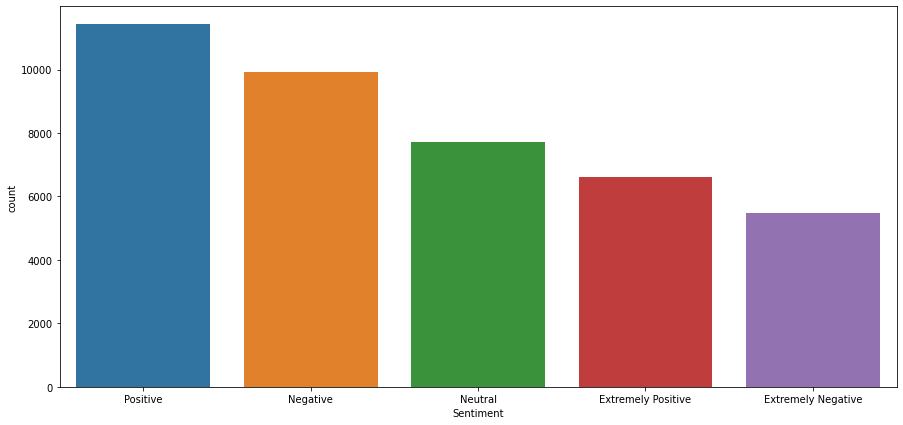

In [68]:
fig = plt.figure(figsize=(15,7))
b = sns.countplot(x='Sentiment', data=traindf, order = traindf['Sentiment'].value_counts().index)
plt.show()

In [69]:
testdf.shape

(3798, 6)

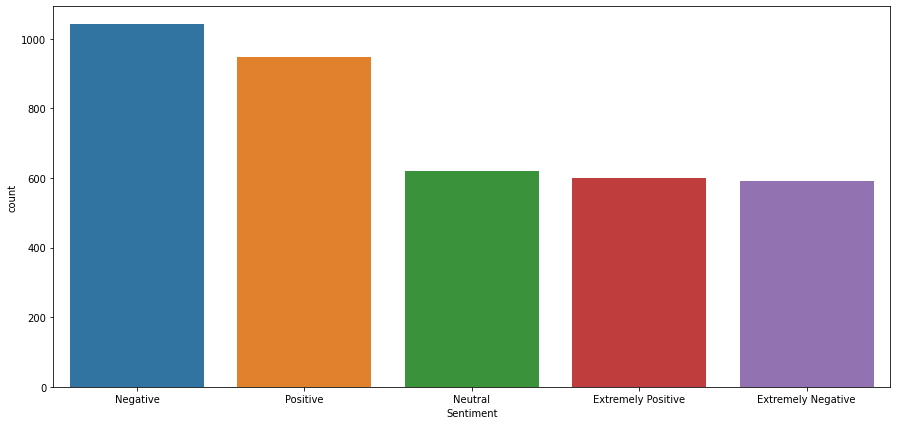

In [70]:
fig = plt.figure(figsize=(15,7))
b = sns.countplot(x='Sentiment', data=testdf, order = testdf['Sentiment'].value_counts().index)
plt.show()

In [71]:
def Category(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'neutral'


In [72]:
traindf['Sentiment'] = traindf['Sentiment'].apply(lambda x: Category(x))
testdf['Sentiment'] = testdf['Sentiment'].apply(lambda x: Category(x))

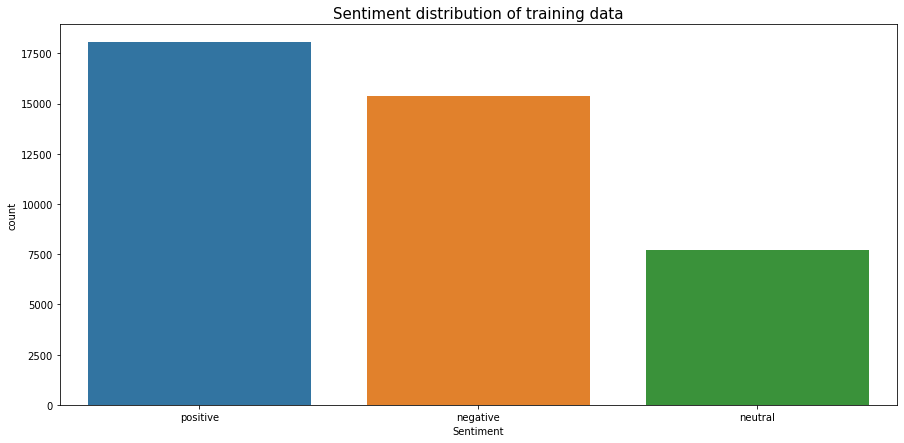

In [73]:
fig = plt.figure(figsize=(15,7))
b = sns.countplot(x='Sentiment', data=traindf, order = traindf['Sentiment'].value_counts().index)
b.set_title('Sentiment distribution of training data', fontdict ={'fontsize':15})
plt.show()

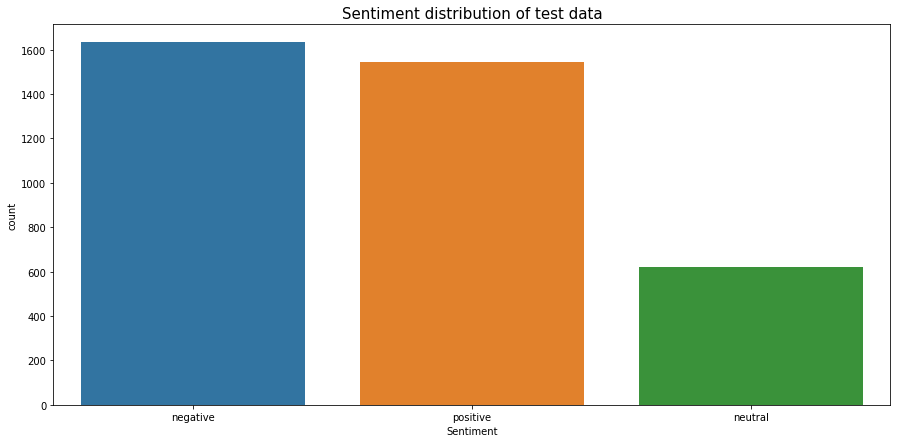

In [74]:
fig = plt.figure(figsize=(15,7))
b = sns.countplot(x='Sentiment', data=testdf, order = testdf['Sentiment'].value_counts().index)
b.set_title('Sentiment distribution of test data', fontdict ={'fontsize':15})
plt.show()

In [75]:
traindf.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,positive
3,3802,48754,Not available,16-03-2020,My food stock is not the only one which is emp...,positive
4,3803,48755,Not available,16-03-2020,"Me, ready to go at supermarket during the #COV...",negative


In [76]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : str.lower(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : str.lower(x))

In [77]:
traindf['OriginalTweet'].head()

0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
3    my food stock is not the only one which is emp...
4    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object

In [78]:
traindf['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [79]:
def Url(text):
  text = re.sub('http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-zA-Z][0-9a-zA-Z]))+', '', text, flags=re.MULTILINE)
  text = text.strip()
  return text

In [80]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : Url(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : Url(x))

In [81]:
traindf['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv  and  and'

In [82]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Loading stop words and removing negative stop words from the list
stop_word = stopwords.words('english')
words_to_keep = ['don\'t', 'aren', 'aren\'t', 'couldn', 
                 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 
                 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 
                 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 
                 'needn', 'needn\'t', 'shan', 'shan\'t', 'no', 'nor', 'not', 
                 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 
                 'won', 'won\'t', 'wouldn', 'wouldn\'t']
Stopwords = stop_word
for word in words_to_keep:
  if word in Stopwords:
    Stopwords.remove(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
def smileys():
 
 return {
":-)":"smiley",
":)":"smiley",
":D":"smiley",
"xD":"smiley",
":’)":"smiley",
":’D":"smiley",
":3":"smiley",
":]":"smiley",
":^)":"smiley",
":-]":"smiley",
":-3":"smiley",
":->":"smiley",
":))":"smiley",
"8-)":"cool",
"8)":"cool",
"8-D":"cool",
"B)":"cool",
"BD":"cool",
":-}":"smiley",
":>":"smiley",
":}":"smiley",
":o)":"smiley",
":c)":"smiley",
"=)":"smiley",
"=D":"smiley",
"=]":"smiley",
":-D":"smiley",
"XD":"smiley",
":o":"surprised",
":O":"surprised",
"=o":"surprised",
"=O":"surprised",
":0":"surprised",
":(":"sad",
":C":"sad",
":c":"sad",
"=(":"sad",
"=c":"sad",
"=C":"sad",
":-(":"sad",
":-c":"sad",
":-C":"sad",
":-<":"sad",
":<":"sad",
":[":"sad",
":{":"sad",
":\'(":"crying",
":P":"playful",
":p":"playful",
"xP":"playful",
"XP":"playful",
"=P":"playful",
"=p":"playful",
"xp":"playful",
"xb":"playful",
"❤":"love",
"</3":"sad",
":/":"worried",
":-/":"worried"
 }

# Removing smilies and emojis
def remove_smileys(text):
  smilies = smileys()
  split_text = text.split(" ")
  for key,val in smilies.items():
    if key in split_text:
      text_de = text.replace(key, val)
      text = text_de
      text = emoji.demojize(text)
      text = " ".join(text.split())
  return text


In [84]:
test = remove_smileys(' This is a test statement with emoji :) :(   xb  8) 8) :\'(')
test

'This is a test statement with emoji smiley sad playful cool cool crying'

In [85]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : remove_smileys(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : remove_smileys(x))

In [86]:
import string
# Removing twitter handles, punctuation, extra spaces, numbers and special characters
def remove_special(text):
  text = re.sub("(@[A-Za-z0-9_]+)","", text) #remove mentions or tags
  text = "".join([char if char not in punctuation else " " for char in text]) #remove all punctuations
  text = re.sub(" +", " ", text) #remove extra white spaces
  text = re.sub("[0–9]+", "", text) #remove in numeric data
  text = re.sub("[^A-Za-z0-9_. ]+","",text) #remove any other characters other than A-Z a-z 0-9. 

  return text

In [87]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : remove_special(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : remove_special(x))

In [88]:
traindf['OriginalTweet'].head()

0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object

In [89]:
from nltk.tokenize import word_tokenize
# Removing stop words from the text
def stop_words(text):
  tokens = word_tokenize(text)
  text_remove = [token for token in tokens if not token in Stopwords]
  clean_text = " ".join(text_remove)
  return clean_text

In [90]:
test = " This is test sentence contains stop words and the is on where then to at are how was ,Hopefully We have removed every stop word"
test = stop_words(test)
test

'This test sentence contains stop words , Hopefully We removed every stop word'

In [91]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : stop_words(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : stop_words(x))

Back in elementary school you learnt the difference between nouns, verbs, adjectives, and adverbs. These "word classes" are not just the idle invention of grammarians, but are useful categories for many language processing tasks.

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset.

In [92]:
 nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
# https://www.nltk.org/book/ch05.html
def get_wordnet_pos(word):
  """Map POS tag to first character lemmatize() accepts"""
  tag = nltk.pos_tag([word])[0][1][0].upper() #get the first letter of part of wor
  tag_dict = {"J": wordnet.ADJ,
  "N": wordnet.NOUN,
  "V": wordnet.VERB,
  "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [93]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  tokens = word_tokenize(text)
  lemmatized_text = []
  for word in tokens:
    lemmatized_text.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))

  return " ".join(lemmatized_text)

In [94]:
traindf['OriginalTweet'] = traindf['OriginalTweet'].apply(lambda x : lemmatize(x))
testdf['OriginalTweet'] = testdf['OriginalTweet'].apply(lambda x : lemmatize(x))

In [95]:
traindf['OriginalTweet'].head()

0                                                     
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock not one empty please panic enough f...
4    ready go supermarket covid1 outbreak not paran...
Name: OriginalTweet, dtype: object

In [96]:
train = traindf.iloc[:,4:]
test = testdf.iloc[:,4:]

In [97]:
train.head()

,OriginalTweet,Sentiment
0,,neutral
1,advice talk neighbour family exchange phone nu...,positive
2,coronavirus australia woolworth give elderly d...,positive
3,food stock not one empty please panic enough f...,positive
4,ready go supermarket covid1 outbreak not paran...,negative


In [98]:
train['Sentiment'] = train['Sentiment'].map({"positive":1, "neutral": 0,"negative":2})
test['Sentiment'] = test['Sentiment'].map({"positive":1, "neutral": 0,"negative":2})

In [99]:
train.head()

,OriginalTweet,Sentiment
0,,0
1,advice talk neighbour family exchange phone nu...,1
2,coronavirus australia woolworth give elderly d...,1
3,food stock not one empty please panic enough f...,1
4,ready go supermarket covid1 outbreak not paran...,2
